In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
model = tf.keras.models.load_model('trained_model.keras', compile=False)

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [8]:
##Visualizaing Single Image of Test set

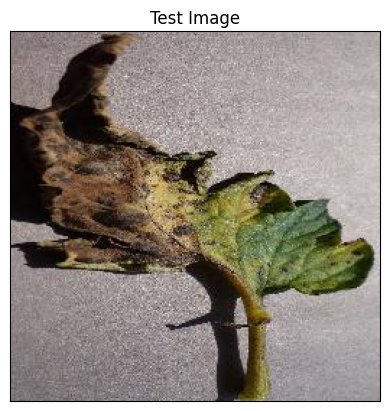

In [6]:
import cv2
image_path = "test/test/TomatoEarlyBlight1.JPG"
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Convert BGR image to RGB

#Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [19]:
##Testing Model

In [7]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [8]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 1s 1s/step


(array([[1.0392405e-04, 7.2758405e-05, 4.2872985e-06, 4.3580356e-05,
         5.7748028e-05, 9.0854031e-05, 6.7729711e-06, 1.5857863e-06,
         8.6625347e-05, 1.1605323e-06, 2.6113388e-05, 3.9998833e-03,
         5.3645825e-01, 9.1043691e-04, 3.7106118e-01, 2.1131782e-05,
         2.2782835e-03, 6.2818494e-06, 2.5867494e-06, 8.4766440e-02]],
       dtype=float32),
 (1, 20))

In [9]:
result_index = np.argmax(prediction)
result_index

12

In [10]:
class_name  = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

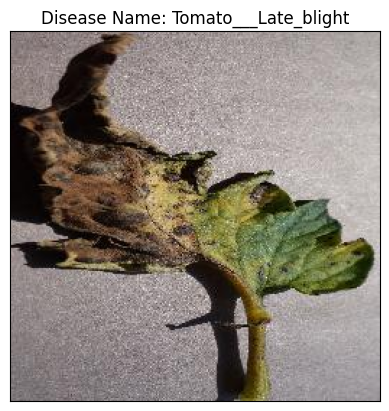

In [11]:
#Displaying Result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [12]:
model_prediction

'Tomato___Late_blight'